<a href="https://colab.research.google.com/github/surf0123/python/blob/main/number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

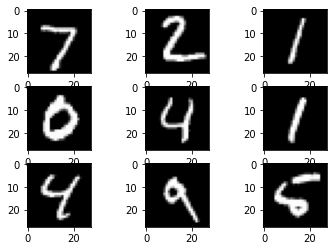

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0159 - accuracy: 0.9148
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0063 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0044 - accuracy: 0.9773
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0034 - accuracy: 0.9827
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0027 - accuracy: 0.9864


In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.mnist.load_data()

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(test_images[i], cmap=plt.get_cmap('gray'))
plt.show()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy'])            

train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

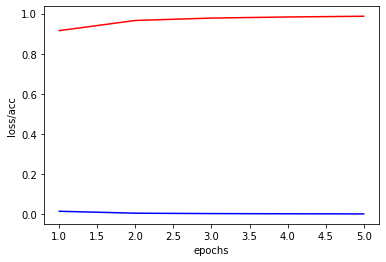

테스트 정확도: [0.9147999882698059, 0.9654499888420105, 0.9772833585739136, 0.9827333092689514, 0.9864166378974915]


In [21]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()
print('테스트 정확도:', acc)

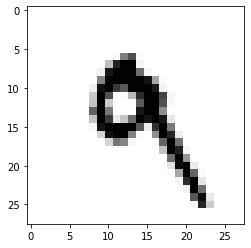

In [22]:
image =test_images[7]
plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

In [23]:

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())

추정된 숫자= 9


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


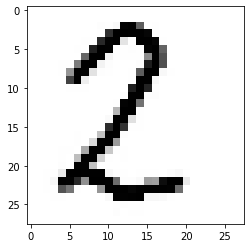

추정된 숫자= 2


In [24]:
import os 
import glob 
from google.colab import drive 

drive.mount('/content/drive')
# 직접입력한 숫자 인식
import cv2 as cv
image = cv.imread('/content/drive/MyDrive/test.jpg', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 784)
image = 255-image
image /= 255.0

plt.imshow(image.reshape(28, 28),cmap='Greys')
plt.show()

pred = model.predict(image.reshape(1, 784), batch_size=1)
print("추정된 숫자=", pred.argmax())